In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

EMBRYO_num = 3
AI_CELL = 'Cpaaa'
TARGET_CELL = 'ABarpaapp'
RESOLUTION = 0.254
def load_data(embryo):
    """
    input:
        embryo: int, choose embryo from 0-2
    output:
        data_dicts:dict,dict[nuclei stage][name key][pos/radius],containing postion, radius, cell name
        ai_first_appear: int, 'Cpaaa' first appear nuclei stage
        ai_last_appear: int, 'ABarpaapp' first appear nuclei stage
        target_first_appear: int, 'Cpaaa' die nuclei stage
        target_last_appear: int, 'ABarpaapp' die nuclei stage
    """
    pos_a = []
    radius_a =[]
    cell_name_a = []
    data_dicts = []
    ai_list = []
    target_list = []
    nuclei_num = len(os.listdir('./data/cpaaa_%d/nuclei' % embryo))
    if embryo == 0:
        nuclei_num = 334
    for i in range (nuclei_num - 1):
        path = './data/cpaaa_%d/nuclei/t%03d-nuclei' % (embryo,i + 1)
        pos = []
        radius = []
        cell_name = []
        with open(path) as file:
            for line in file:
                line = line[:len(line)-1]
                vec = line.split(', ')
                if vec[9] == '':
                    continue
                else:
                    id = int(vec[0])
                    pos.append(np.array(((float(vec[5])*RESOLUTION), (float(vec[6])*RESOLUTION), (float(vec[7])))))
#                     pos.append(np.array((float(vec[5]), float(vec[6]), float(vec[7])/RESOLUTION)))
                    radius.append(float(vec[8]) / 2)
                    cell_name.append(vec[9])
        pos_a.append(pos)
        radius_a.append(radius)
        cell_name_a.append(cell_name)
        pos_radius = list(zip(pos, radius))
        data_dict = dict(zip(cell_name, pos_radius))
        data_dicts.append(data_dict)
    
    for i in range(len(cell_name_a)):
        if AI_CELL in cell_name_a[i]:
            ai_list.append(i)
        if TARGET_CELL in cell_name_a[i]:
            target_list.append(i)
    if ai_list != []:
        ai_first_appear = ai_list[0]
        target_first_appear = target_list[0]
        ai_last_appear = ai_list[-1]
        target_last_appear = target_list[-1]
    else:
        ai_first_appear = 0
        target_first_appear = 0
    return data_dicts,ai_first_appear,ai_last_appear,target_first_appear,target_last_appear

In [2]:
#######Single Embryo distance figure######
def Embryo_dis(embryo):
    """
    input:
        embryo: int, choose embryo from 0-2
    output:
        Distance_to_target
    """
    time_resolution = 1.25
    shift_point = 20
    data_dicts,ai_first_appear,ai_last_appear,target_first_appear,target_last_appear = load_data(embryo)
    ####Starting and ending stage, starting point and the end points (x,y,z) of these two cells
    print('AI cell \nappear stage: (%s,%s)' % (ai_first_appear,ai_last_appear))
    print('starting location {} \nending location   {}'.format(data_dicts[ai_first_appear][AI_CELL][0],data_dicts[ai_last_appear][AI_CELL][0]))
    print('\nTARGET cell \nappear stage: (%s,%s)'% (target_first_appear,target_last_appear))
    print('starting location {} \nending location   {}'.format(data_dicts[target_first_appear][TARGET_CELL][0],data_dicts[target_last_appear][TARGET_CELL][0]))
    ####Maximum distance using starting stage of AI cell
    pos = []
    
    for key in data_dicts[target_first_appear].keys():
        pos.append(data_dicts[target_first_appear][key][0])
    distances = []
    for i in range(len(pos)):
        for j in range(len(pos)):
            distances.append(np.linalg.norm(pos[i]-pos[j])) 
    print("\nMaximum distance: %d"%max(distances))
    
    ###Distance to target
    distance_to_target = []
    begin = max(ai_first_appear,target_first_appear)
#     begin = ai_first_appear + 15
    difference = target_first_appear - ai_first_appear
    end = min(ai_last_appear,target_last_appear)
    print(begin,end,difference)
    for i in range(end-begin):
        distance_to_target.append(np.linalg.norm(data_dicts[begin + i][AI_CELL][0]- \
                                        data_dicts[begin + i][TARGET_CELL][0]))        
    ##shifting range
    distance_to_target_mid = (max(distance_to_target) + min(distance_to_target)) / 2
    distance_to_target_mid_index = np.argmin(np.abs(np.array(distance_to_target)-distance_to_target_mid))
    print("average_y_mid: {}\ny_mid_index: {}\nactual_y_mid[y_mid_index]: {}\n".format(distance_to_target_mid, distance_to_target_mid_index,distance_to_target[distance_to_target_mid_index]))
    shift_num = distance_to_target_mid_index - shift_point
    print("shift step: %f"% shift_num)
    
    ###Draw distance figure
    fig = plt.figure(1)
    plt.title("Distance to target cell over time")
    plt.xlabel("Time(s)")
    plt.ylabel("Distance to target cell(um)")
    plt.plot([time_resolution * k for k in range(len(distance_to_target))],distance_to_target)
    plt.show()
    return distance_to_target, shift_num, distance_to_target_mid_index, difference

AI cell 
appear stage: (102,139)
starting location [40.386 52.578 23.   ] 
ending location   [44.958 54.356 24.   ]

TARGET cell 
appear stage: (106,136)
starting location [56.896 67.056 23.   ] 
ending location   [53.848 61.722 24.   ]

Maximum distance: 63
106 136 4
average_y_mid: 15.215818674355614
y_mid_index: 17
actual_y_mid[y_mid_index]: 15.12420179711974

shift step: -3.000000


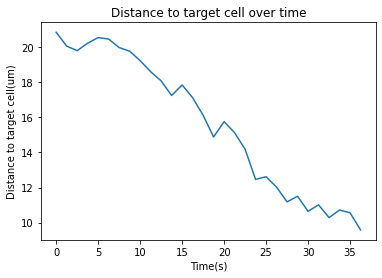

AI cell 
appear stage: (94,133)
starting location [42.418 49.022 24.   ] 
ending location   [46.482 50.038 25.   ]

TARGET cell 
appear stage: (96,132)
starting location [63.246 41.402 24.   ] 
ending location   [57.15  47.752 25.   ]

Maximum distance: 54
96 132 2
average_y_mid: 16.031532876814694
y_mid_index: 18
actual_y_mid[y_mid_index]: 16.146490516517822

shift step: -2.000000


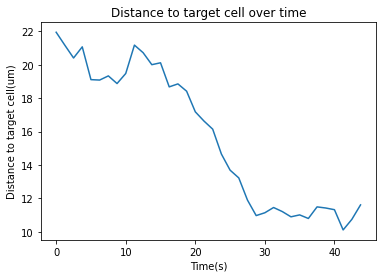

AI cell 
appear stage: (90,131)
starting location [95.758 54.864  8.   ] 
ending location   [95.504 58.674  8.   ]

TARGET cell 
appear stage: (95,127)
starting location [98.806 76.2    8.   ] 
ending location   [96.012 68.58   8.   ]

Maximum distance: 52
95 127 5
average_y_mid: 15.089322144794306
y_mid_index: 12
actual_y_mid[y_mid_index]: 15.199730129183207

shift step: -8.000000


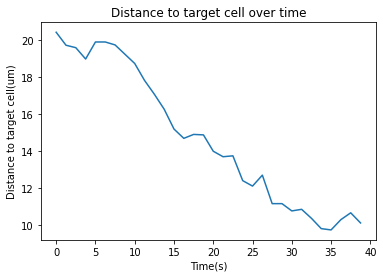

In [3]:
###Calculate each cell's shitfting number and distance to target
time_resolution_2D = 1.25
distances = []
shift_nums = []
distance_to_target_mid_indexs = []
differences = []
for i in range(EMBRYO_num):
    distance, shift_num, distance_to_target_mid_index, difference = Embryo_dis(i)
    distances.append(distance)
    shift_nums.append(shift_num)
    distance_to_target_mid_indexs.append(distance_to_target_mid_index)
    differences.append(difference)

distances_shifted = []
for i in range(len(distances)):
    distances_shifted.append([0 for i in range(abs(shift_nums[i]))] + distances[i])

In [4]:
dist_region = np.load('./observation/dist_region.npy')
distances_avg = dist_region[0]
distances_stdev = dist_region[1]
distances_upper = dist_region[2]
distances_lower = dist_region[3]

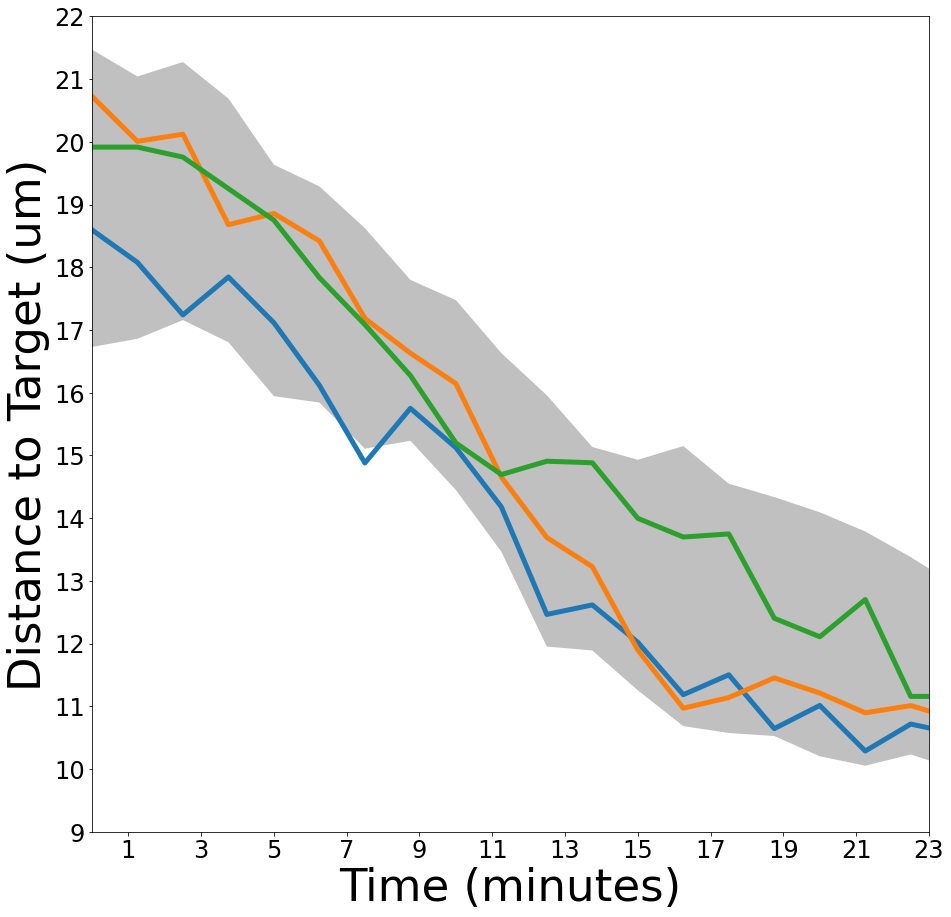

In [5]:
#Plot raw distance to target plot
fig = plt.figure(figsize=(15,15))

plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)

for i in range(len(distances_shifted)):
    plt.plot([time_resolution_2D * k for k in range(len(distances_shifted[i]))],distances_shifted[i], linewidth = 5)

# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
# plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.yticks(ticks = np.arange(0,24),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 35, ymax = 90)
plt.ylim(ymin = 9, ymax = 22)

# plt.legend(fontsize = 45)
plt.show()

# FOR DRL CASE:

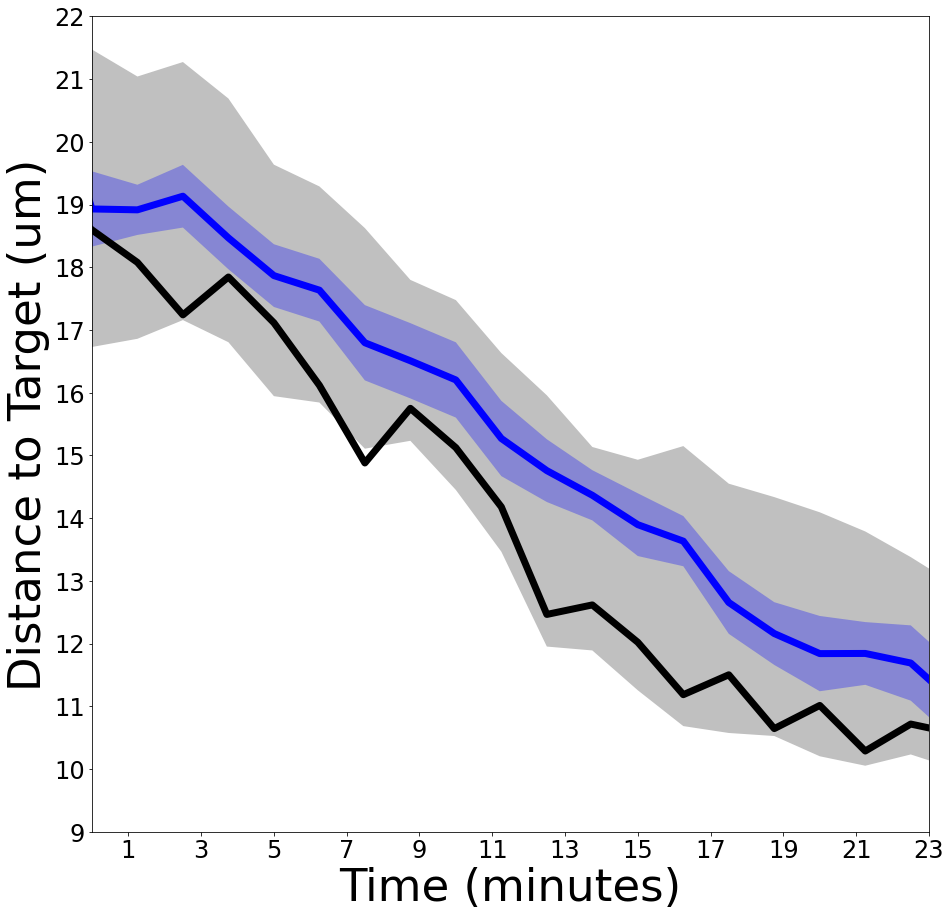

In [6]:
#Plot distance to target plot for embryo 1
EM = 0
em_dist = np.load('./DRL/saved_data/em0_dist.npy')
em_region = np.load('./DRL/saved_data/em0_region.npy')
fig = plt.figure(figsize=(15,15))
plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)

plt.plot([time_resolution_2D * k for k in range(len(distances_shifted[EM]))],distances_shifted[EM],linewidth = 7,c = 'black')
plt.plot([time_resolution_2D * k for k in range(len(em_dist))],em_dist,linewidth = 7,c = 'b')

plt.fill_between([time_resolution_2D * k for k in range(len(em_dist))], \
                 em_region[0], em_region[1], facecolor='blue', interpolate=True, alpha=0.3)

# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
# plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.yticks(ticks = np.arange(0,24),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 35, ymax = 90)
plt.ylim(ymin = 9, ymax = 22)

# plt.legend(fontsize = 45)
plt.show()

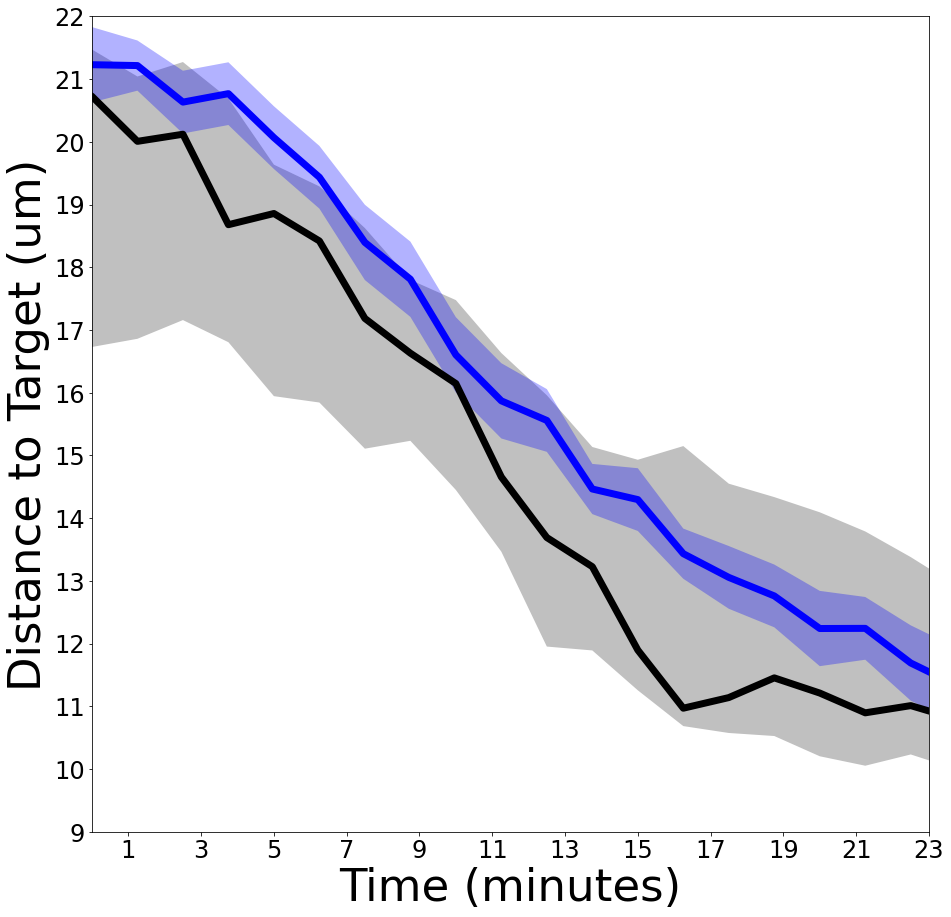

In [7]:
#Plot distance to target plot for embryo 2
EM = 1
em_dist = np.load('./DRL/saved_data/em1_dist.npy')
em_region = np.load('./DRL/saved_data/em1_region.npy')
fig = plt.figure(figsize=(15,15))
plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)

plt.plot([time_resolution_2D * k for k in range(len(distances_shifted[EM]))],distances_shifted[EM],linewidth = 7,c = 'black')
plt.plot([time_resolution_2D * k for k in range(len(em_dist))],em_dist,linewidth = 7,c = 'b')

plt.fill_between([time_resolution_2D * k for k in range(len(em_dist))], \
                 em_region[0], em_region[1], facecolor='blue', interpolate=True, alpha=0.3)

# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
# plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.yticks(ticks = np.arange(0,24),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 35, ymax = 90)
plt.ylim(ymin = 9, ymax = 22)

# plt.legend(fontsize = 45)
plt.show()

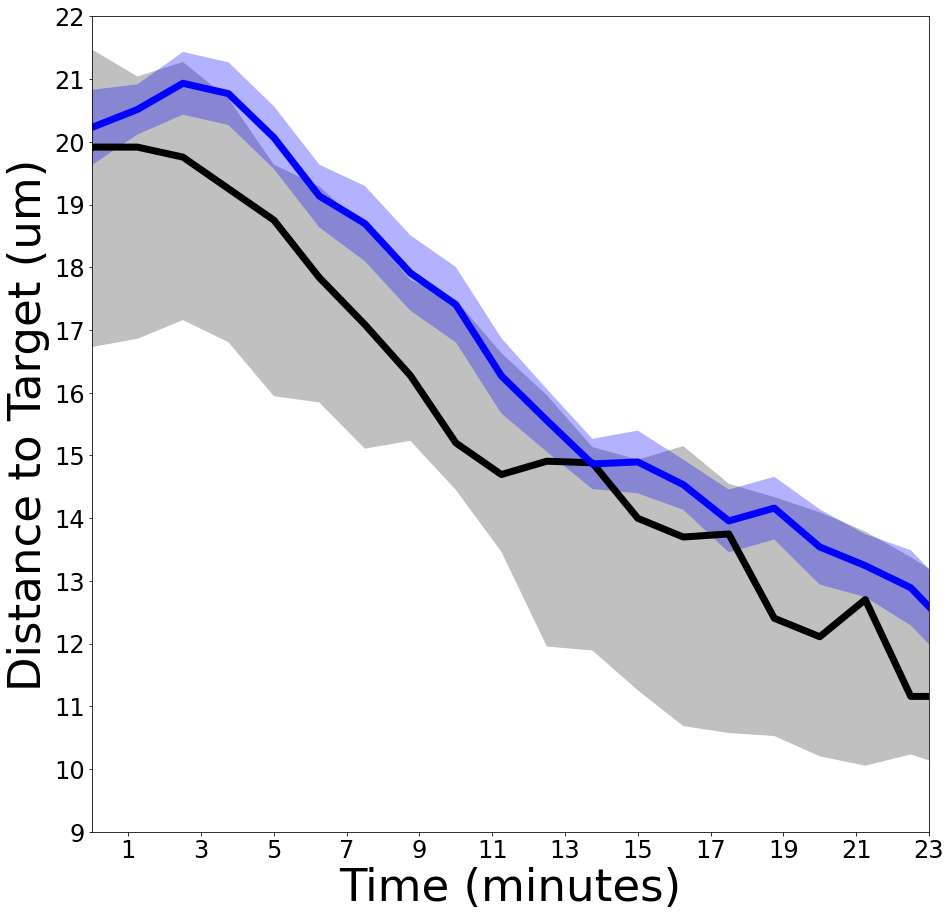

In [8]:
#Plot distance to target plot for embryo 3
EM = 2
em_dist = np.load('./DRL/saved_data/em2_dist.npy')
em_region = np.load('./DRL/saved_data/em2_region.npy')
fig = plt.figure(figsize=(15,15))
plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)

plt.plot([time_resolution_2D * k for k in range(len(distances_shifted[EM]))],distances_shifted[EM],linewidth = 7,c = 'black')
plt.plot([time_resolution_2D * k for k in range(len(em_dist))],em_dist,linewidth = 7,c = 'b')

plt.fill_between([time_resolution_2D * k for k in range(len(em_dist))], \
                 em_region[0], em_region[1], facecolor='blue', interpolate=True, alpha=0.3)

# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
# plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.yticks(ticks = np.arange(0,24),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 35, ymax = 90)
plt.ylim(ymin = 9, ymax = 22)

# plt.legend(fontsize = 45)
plt.show()

# FOR HDRL CASE:

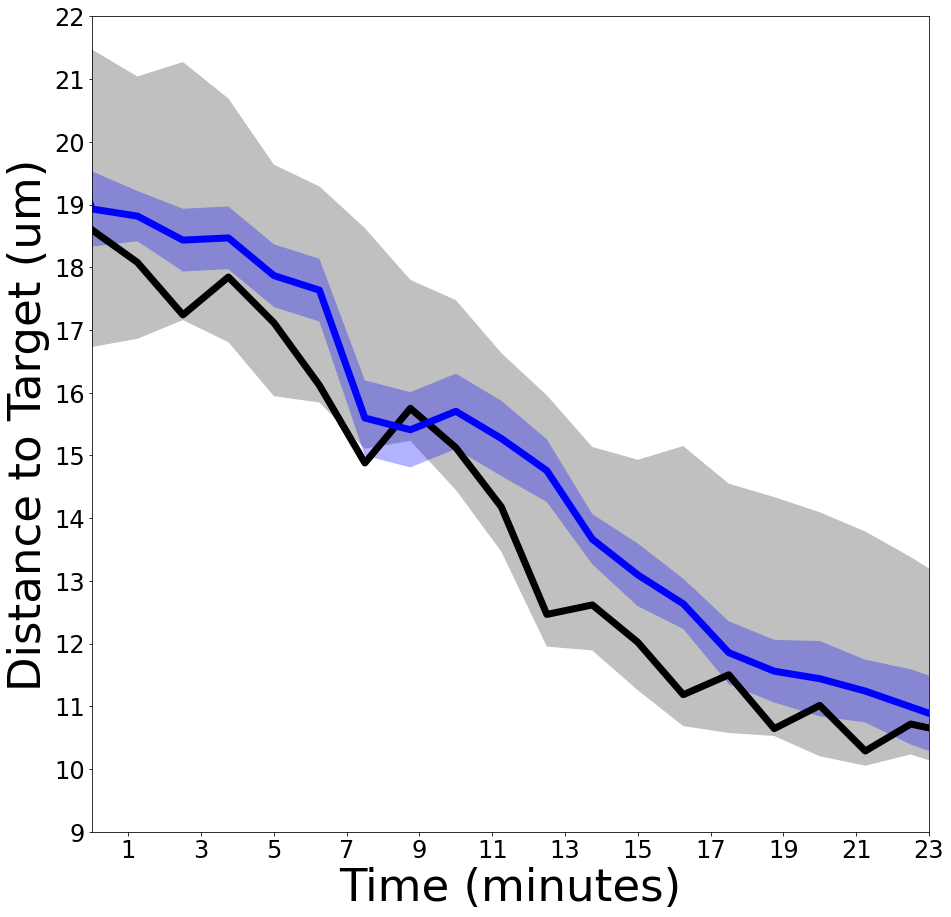

In [9]:
#Plot distance to target plot for embryo 1
EM = 0
em_dist = np.load('./HDRL/saved_data/em0_dist.npy')
em_region = np.load('./HDRL/saved_data/em0_region.npy')
fig = plt.figure(figsize=(15,15))
plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)

plt.plot([time_resolution_2D * k for k in range(len(distances_shifted[EM]))],distances_shifted[EM],linewidth = 7,c = 'black')
plt.plot([time_resolution_2D * k for k in range(len(em_dist))],em_dist,linewidth = 7,c = 'b')

plt.fill_between([time_resolution_2D * k for k in range(len(em_dist))], \
                 em_region[0], em_region[1], facecolor='blue', interpolate=True, alpha=0.3)

# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
# plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.yticks(ticks = np.arange(0,24),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 35, ymax = 90)
plt.ylim(ymin = 9, ymax = 22)

# plt.legend(fontsize = 45)
plt.show()

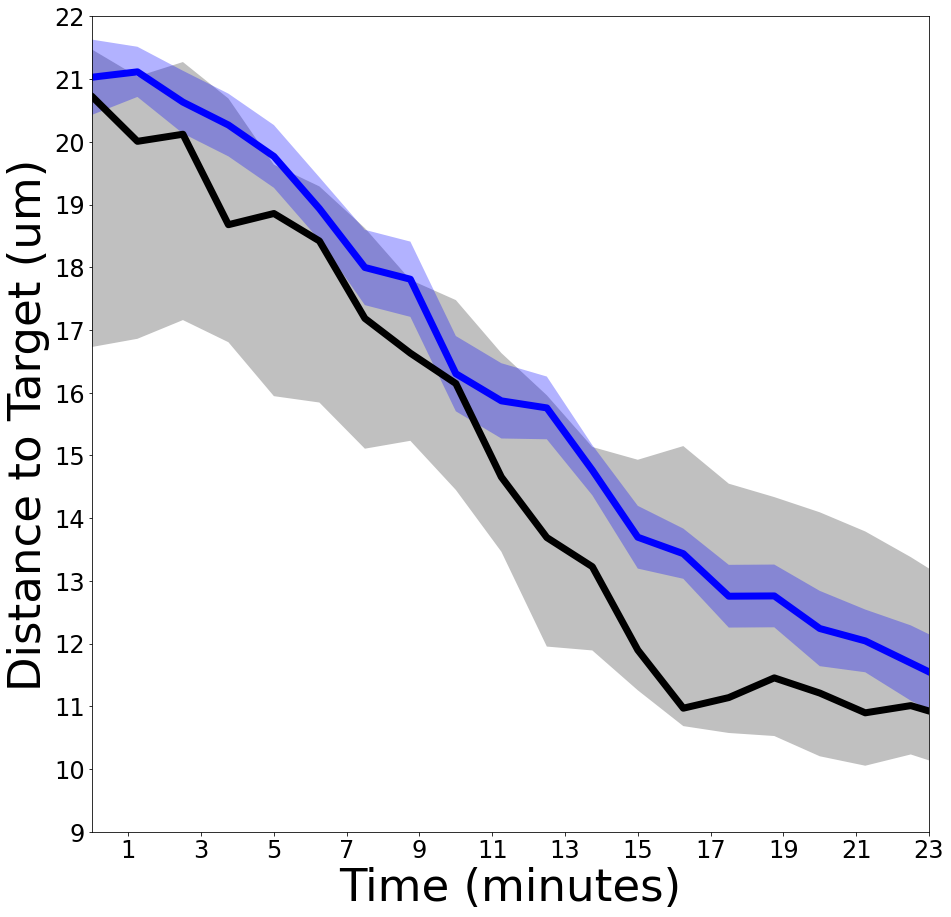

In [10]:
#Plot distance to target plot for embryo 2
EM = 1
em_dist = np.load('./HDRL/saved_data/em1_dist.npy')
em_region = np.load('./HDRL/saved_data/em1_region.npy')
fig = plt.figure(figsize=(15,15))
plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)

plt.plot([time_resolution_2D * k for k in range(len(distances_shifted[EM]))],distances_shifted[EM],linewidth = 7,c = 'black')
plt.plot([time_resolution_2D * k for k in range(len(em_dist))],em_dist,linewidth = 7,c = 'b')

plt.fill_between([time_resolution_2D * k for k in range(len(em_dist))], \
                 em_region[0], em_region[1], facecolor='blue', interpolate=True, alpha=0.3)

# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
# plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.yticks(ticks = np.arange(0,24),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 35, ymax = 90)
plt.ylim(ymin = 9, ymax = 22)

# plt.legend(fontsize = 45)
plt.show()

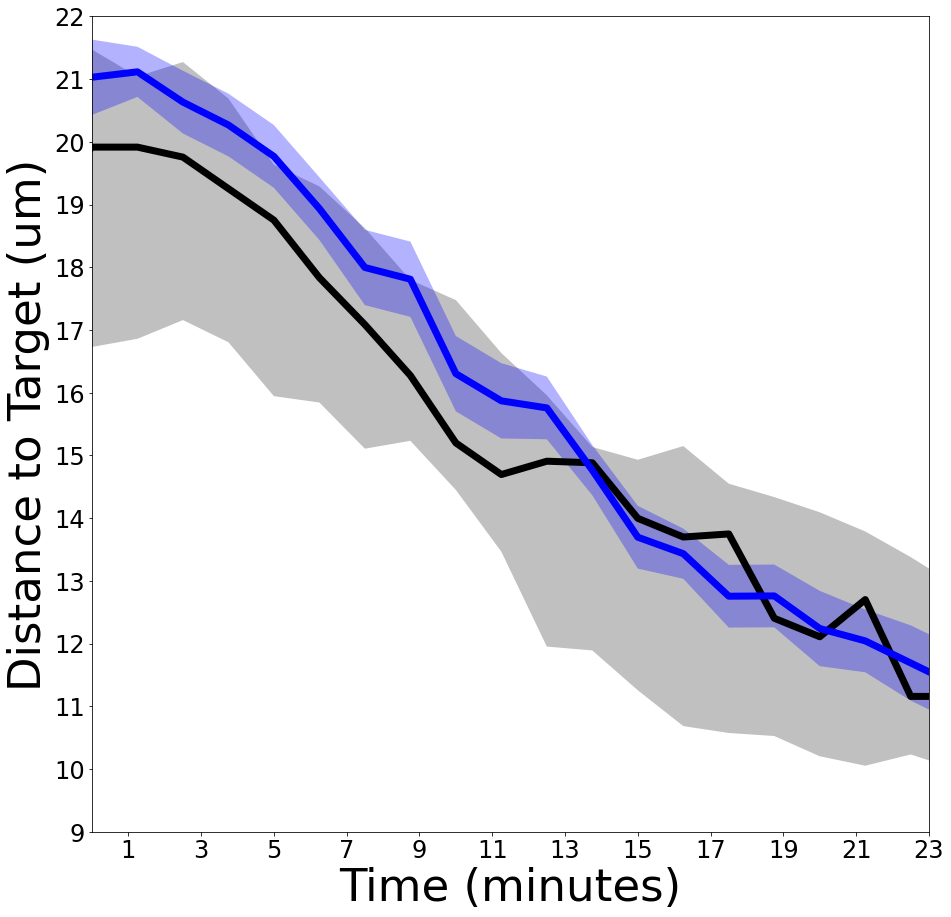

In [11]:
#Plot distance to target plot for embryo 3
EM = 2
em_dist = np.load('./HDRL/saved_data/em1_dist.npy')
em_region = np.load('./HDRL/saved_data/em1_region.npy')
fig = plt.figure(figsize=(15,15))
plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)

plt.plot([time_resolution_2D * k for k in range(len(distances_shifted[EM]))],distances_shifted[EM],linewidth = 7,c = 'black')
plt.plot([time_resolution_2D * k for k in range(len(em_dist))],em_dist,linewidth = 7,c = 'b')

plt.fill_between([time_resolution_2D * k for k in range(len(em_dist))], \
                 em_region[0], em_region[1], facecolor='blue', interpolate=True, alpha=0.3)

# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
# plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.yticks(ticks = np.arange(0,24),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 35, ymax = 90)
plt.ylim(ymin = 9, ymax = 22)

# plt.legend(fontsize = 45)
plt.show()